---
title: "Support Vector Machine implementation from scratch with Python"
date: "2025-01-15"
author: Anushka Dhiman
categories: [Machine Learning]
---
___

## What is Support Vector Machines (SVMs)

Support Vector Machines (SVMs) are a type of machine learning algorithm used for classification and regression analysis. In particular, linear SVMs are used for binary classification problems where the goal is to separate two classes by a hyperplane.

The hyperplane is a line that divides the feature space into two regions. The SVM algorithm tries to find the hyperplane that maximizes the margin, which is the distance between the hyperplane and the closest points from each class. The points closest to the hyperplane are called support vectors and play a crucial role in the algorithm's optimization process.

In linear SVMs, the hyperplane is defined by a linear function of the input features. The algorithm tries to find the optimal values of the coefficients of this function, called weights, that maximize the margin. This optimization problem can be formulated as a quadratic programming problem, which can be efficiently solved using standard optimization techniques.

In addition to finding the optimal hyperplane, SVMs can also handle non-linearly separable data by using a kernel trick. This technique maps the input features into a higher-dimensional space, where they might become linearly separable. The SVM algorithm then finds the optimal hyperplane in this transformed feature space, which corresponds to a non-linear decision boundary in the original feature space.

Linear SVMs have been widely used in many applications, including text classification, image classification, and bioinformatics. They have the advantage of being computationally efficient and easy to interpret. However, they may not perform well in highly non-linearly separable datasets, where non-linear SVMs may be a better choice.

## SVM Code Implementation using python

Here's an example implementation of a Support Vector Machine (SVM) classifier using gradient descent for optimization:

Key Concepts:

- Margin: SVM aims to maximize the margin (distance between the hyperplane and the closest samples from each class).

- Regularization: The regularization parameter (lambda_param) helps control the trade-off between maximizing the margin and minimizing classification error.

- Gradient Descent: This is used to iteratively optimize the weights and bias.

In [2]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)



In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming the SVM class is defined above and already imported

# Generate synthetic data with 2 classes
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 instead of 0 and 1

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the SVM model
svm = SVM()  # You can add parameters here like learning_rate, lambda_param, etc.
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model by calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In this case, since the data is simple and linearly separable, the SVM classifier likely achieves a perfect accuracy of 100%. However, for more complex data, you may see lower accuracy depending on the dataset's difficulty.

Here's key thing to note, we can fine-tune hyperparameters like learning rate (learning_rate), regularization strength (lambda_param), and the number of iterations (n_iters) to improve performance.

## Visualization

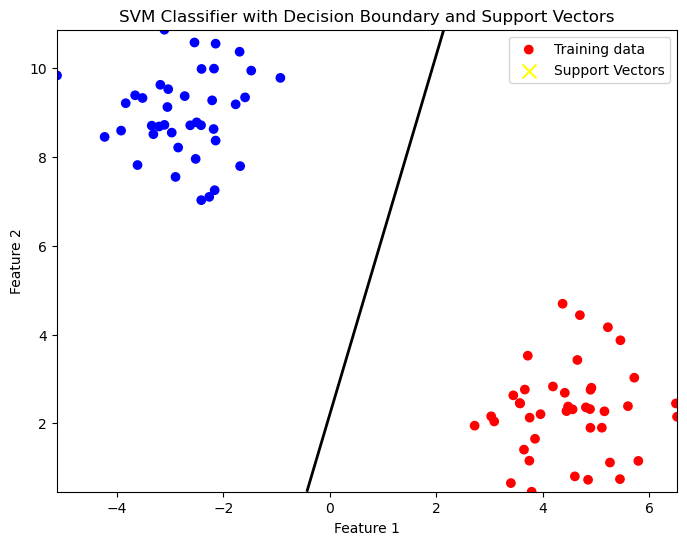

In [6]:
import matplotlib.pyplot as plt

# Plot the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', marker='o', label='Training data')

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Compute the decision function values on the grid
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], svm.w) - svm.b
Z = Z.reshape(xx.shape)

# Plot the contour of the decision boundary
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')

# Plot the support vectors (samples closest to the decision boundary)
support_vectors = np.where(np.abs(np.dot(X_train, svm.w) - svm.b) <= 1)[0]
plt.scatter(X_train[support_vectors, 0], X_train[support_vectors, 1], c='yellow', marker='x', s=100, label='Support Vectors')

# Show plot with appropriate labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classifier with Decision Boundary and Support Vectors')
plt.legend(loc='best')
plt.show()

The resultant plot shows:

- Blue and Red dots representing the two different classes.
- A black line representing the decision boundary that separates the classes.
- Yellow 'X' markers for the support vectors, which are the critical data points closest to the decision boundary.